In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Read the dataset
data = pd.read_csv("ipl.csv")

# Display the first few rows of the data
print("Original Data: ")
print(data.head())

# Drop unnecessary columns
columns_to_drop = ['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Handling missing data if any (filling missing values with 0 for simplicity)
data.fillna(0, inplace=True)

# Save the cleaned data to a new CSV file
data.to_csv('ipl_cleaned.csv', index=False)
print("Data cleaned and saved as 'ipl_cleaned.csv'")



Original Data: 
   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0     

The predicted total runs for the input is: 148.19794337801764


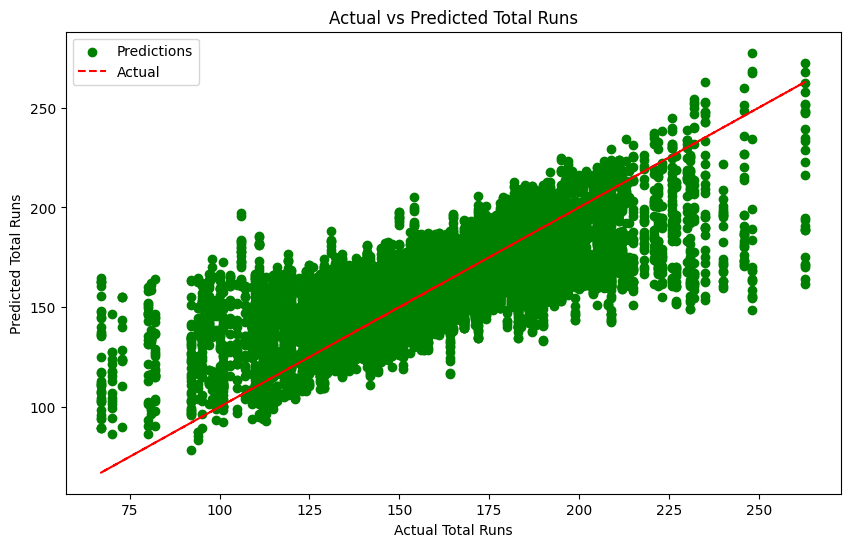

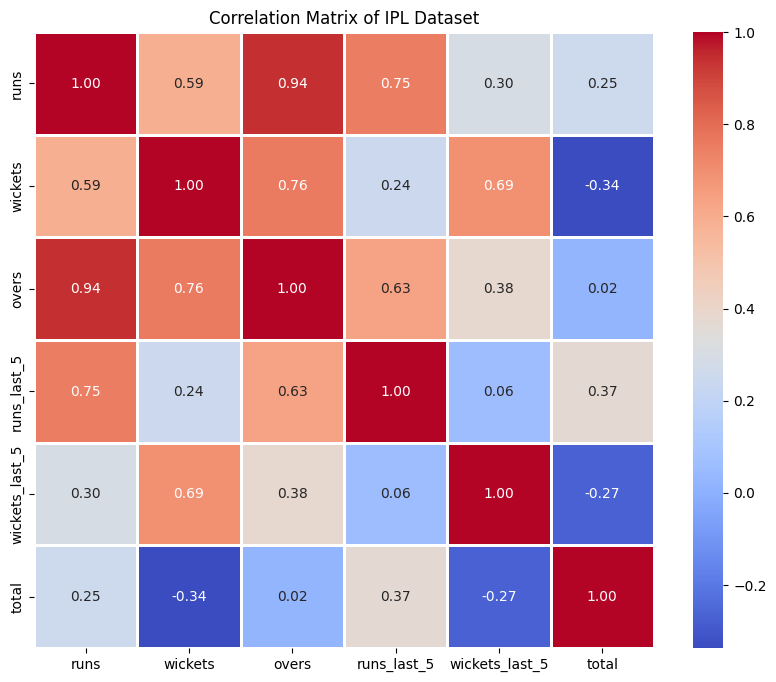

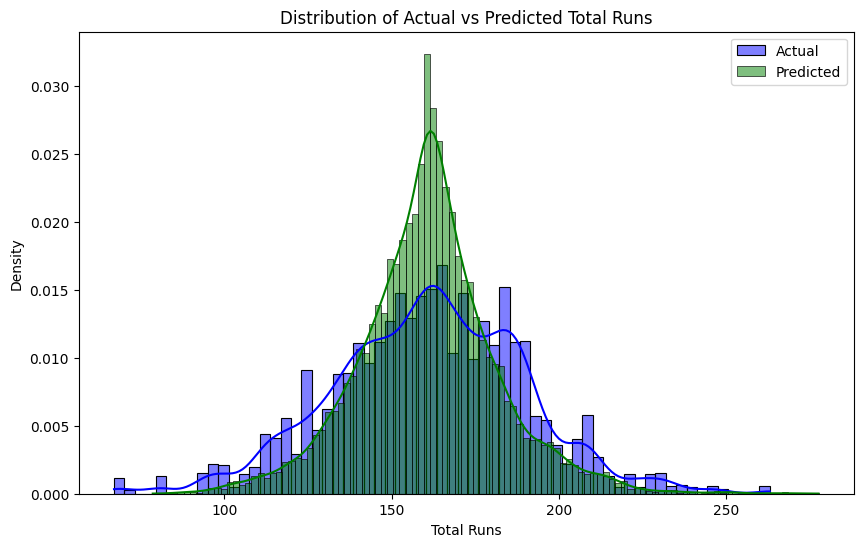

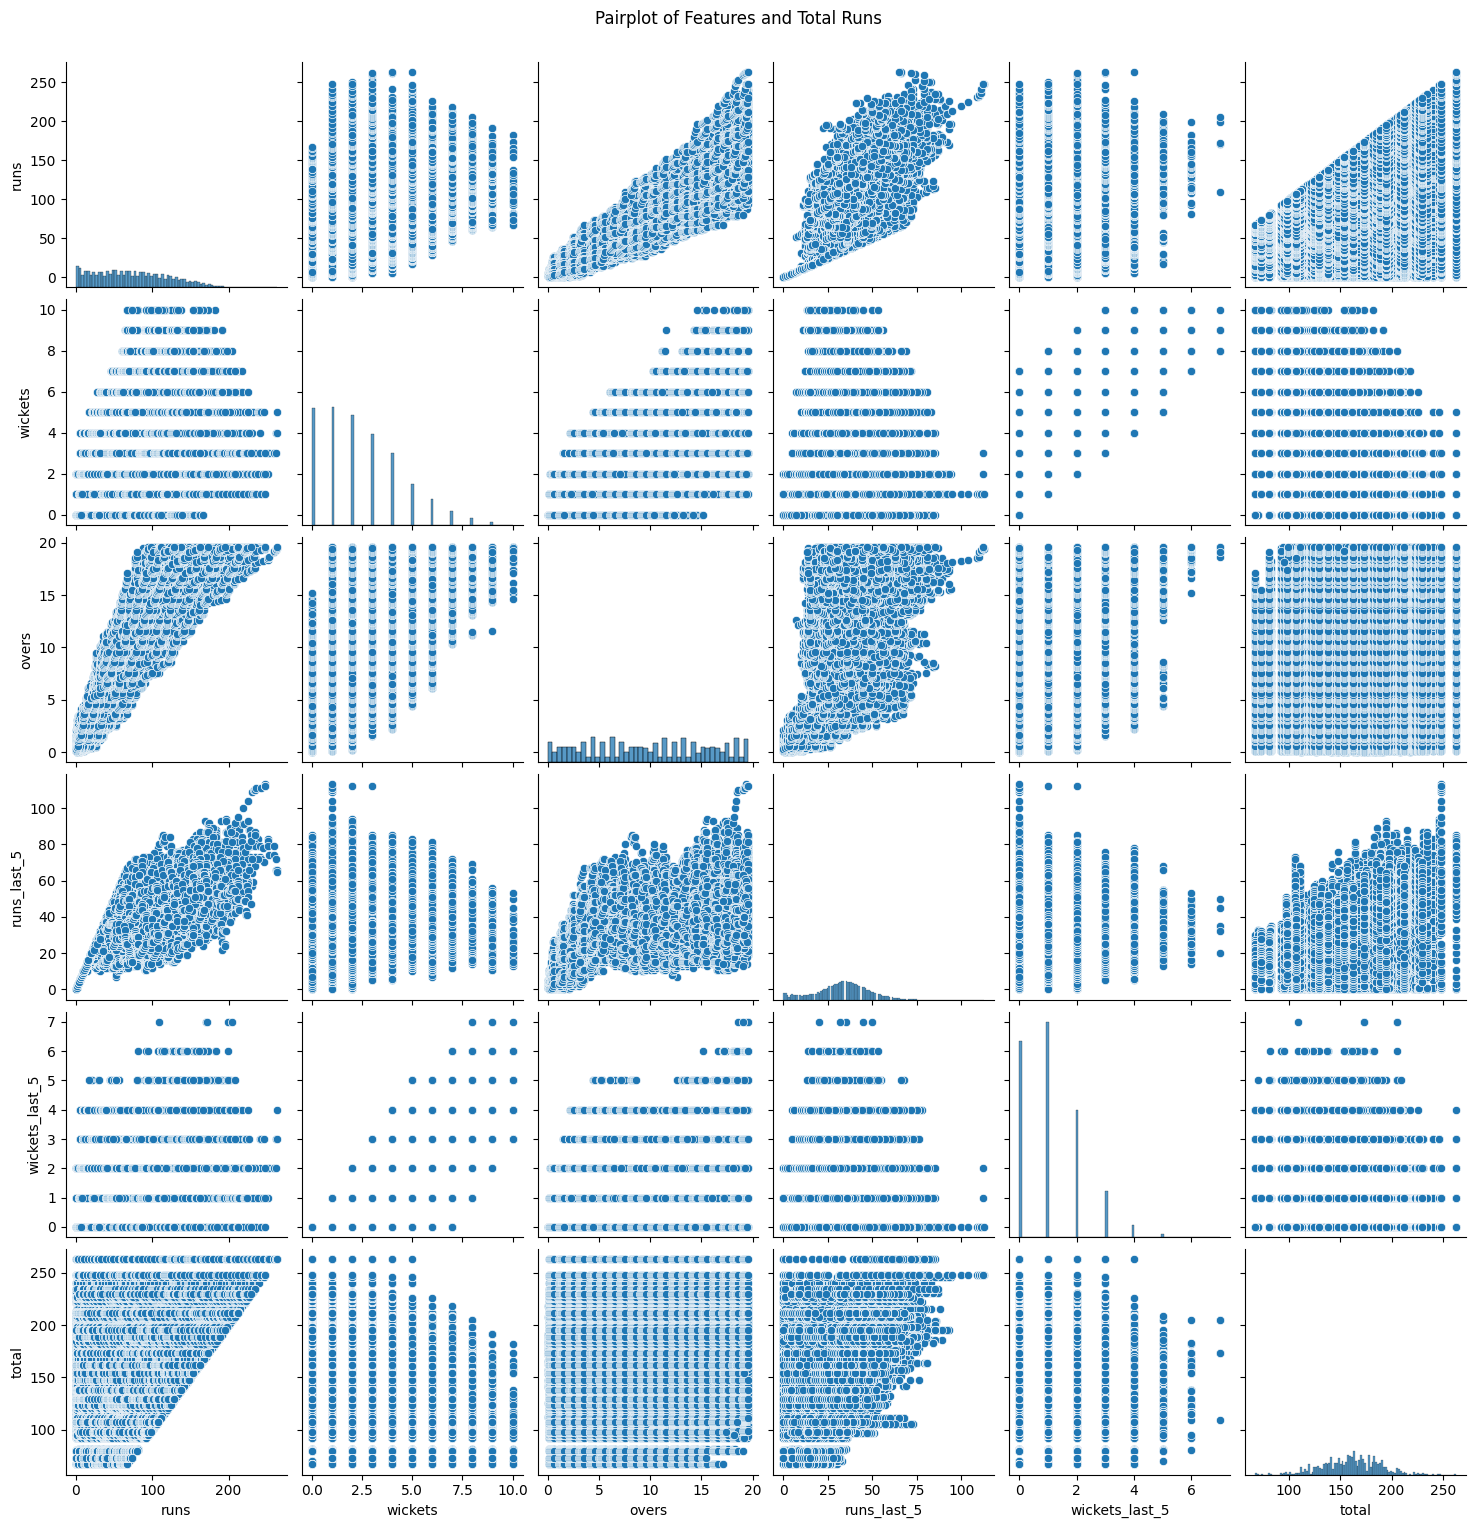

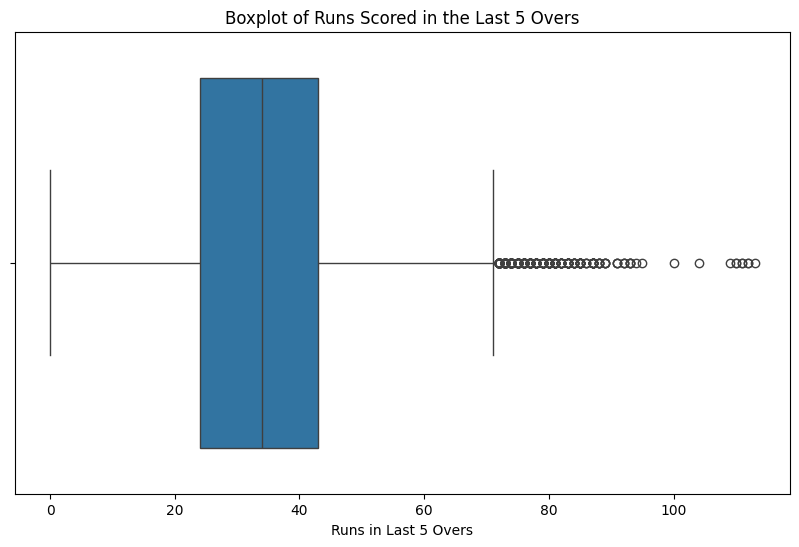

In [20]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
data = pd.read_csv("ipl_cleaned.csv")

# Selecting features (X) and label (Y)
X = data[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]
Y = data['total']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on test data
predictions = model.predict(X_test)

# Example input for prediction (adjust values based on the dataset's context)
inp = np.array([[1, 0, 2.1, 5, 1]])
inp_df = pd.DataFrame(inp, columns=X.columns)

# Predict using the trained model
prediction = model.predict(inp_df)
print('The predicted total runs for the input is:', prediction[0])

# Plot the actual vs predicted total runs
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, color='g', label='Predictions')
plt.plot(Y_test, Y_test, color='r', linestyle='--', label='Actual')
plt.title("Actual vs Predicted Total Runs")
plt.xlabel("Actual Total Runs")
plt.ylabel("Predicted Total Runs")
plt.legend()
plt.show()

# Additional Graph 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix of IPL Dataset')
plt.show()

# Additional Graph 2: Distribution of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='blue', label='Actual', kde=True, stat='density')
sns.histplot(predictions, color='green', label='Predicted', kde=True, stat='density')
plt.title('Distribution of Actual vs Predicted Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Density')
plt.legend()
plt.show()


# Additional Graph 4: Pairplot of Key Features vs. Total Runs
sns.pairplot(data[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']])
plt.suptitle('Pairplot of Features and Total Runs', y=1.02)
plt.show()

# Additional Graph 5: Boxplot of Runs in the Last 5 Overs
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['runs_last_5'])
plt.title("Boxplot of Runs Scored in the Last 5 Overs")
plt.xlabel("Runs in Last 5 Overs")
plt.show()



Mean Squared Error (MSE): 404.15060309450826
Root Mean Squared Error (RMSE): 20.10349728516181
R-squared (R²): 0.5208599136090353


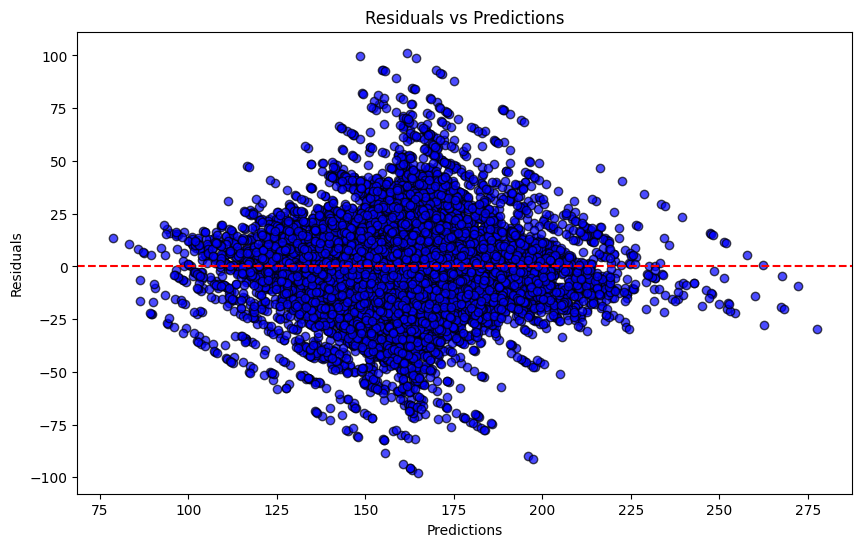

In [21]:
# Evaluate the model's performance using metrics
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
rmse = np.sqrt(mse)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optional: Plotting residuals
residuals = Y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='b', edgecolor='k', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()


The predicted total runs for the input is: 148.19794337801764


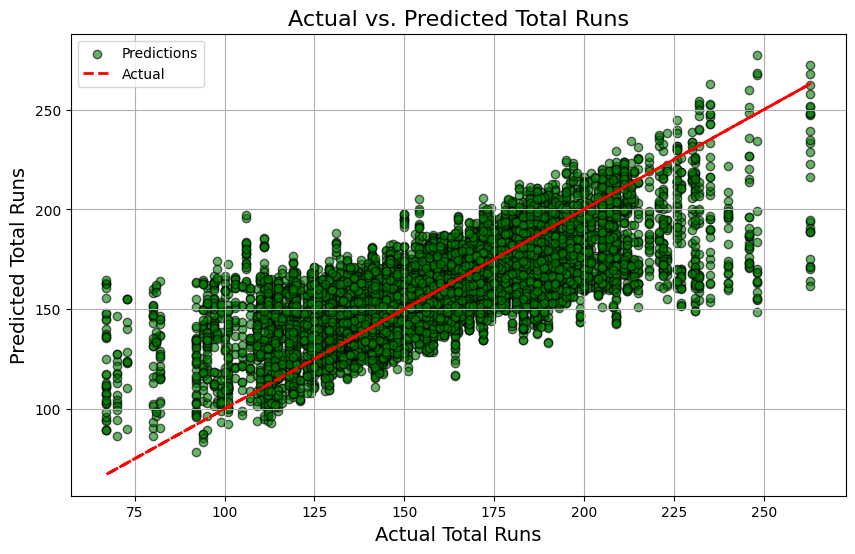

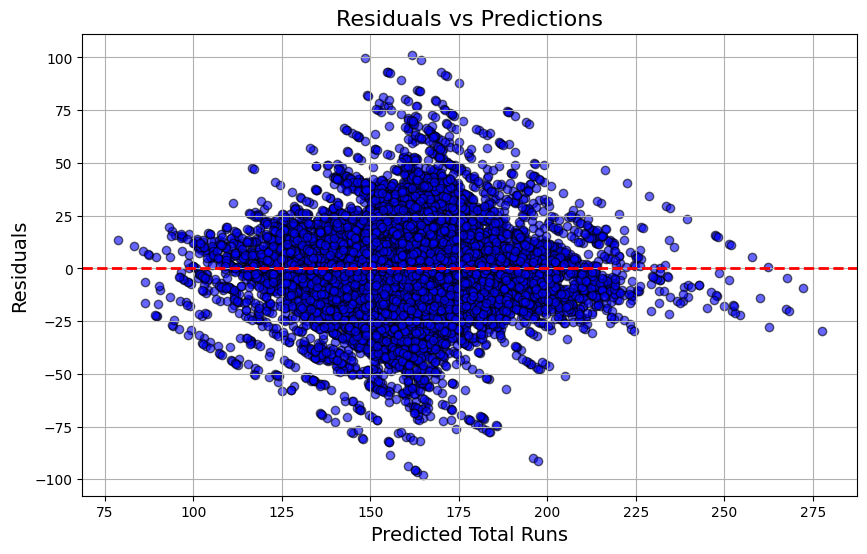

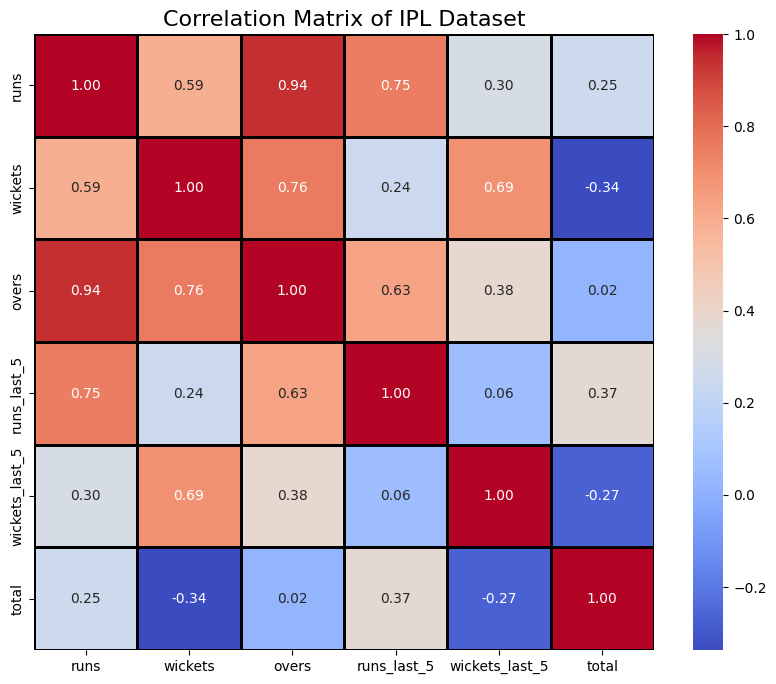

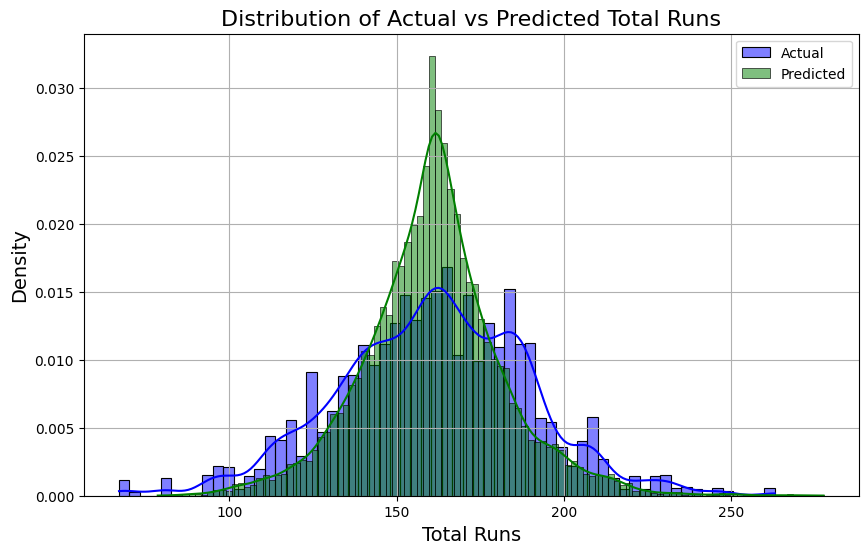

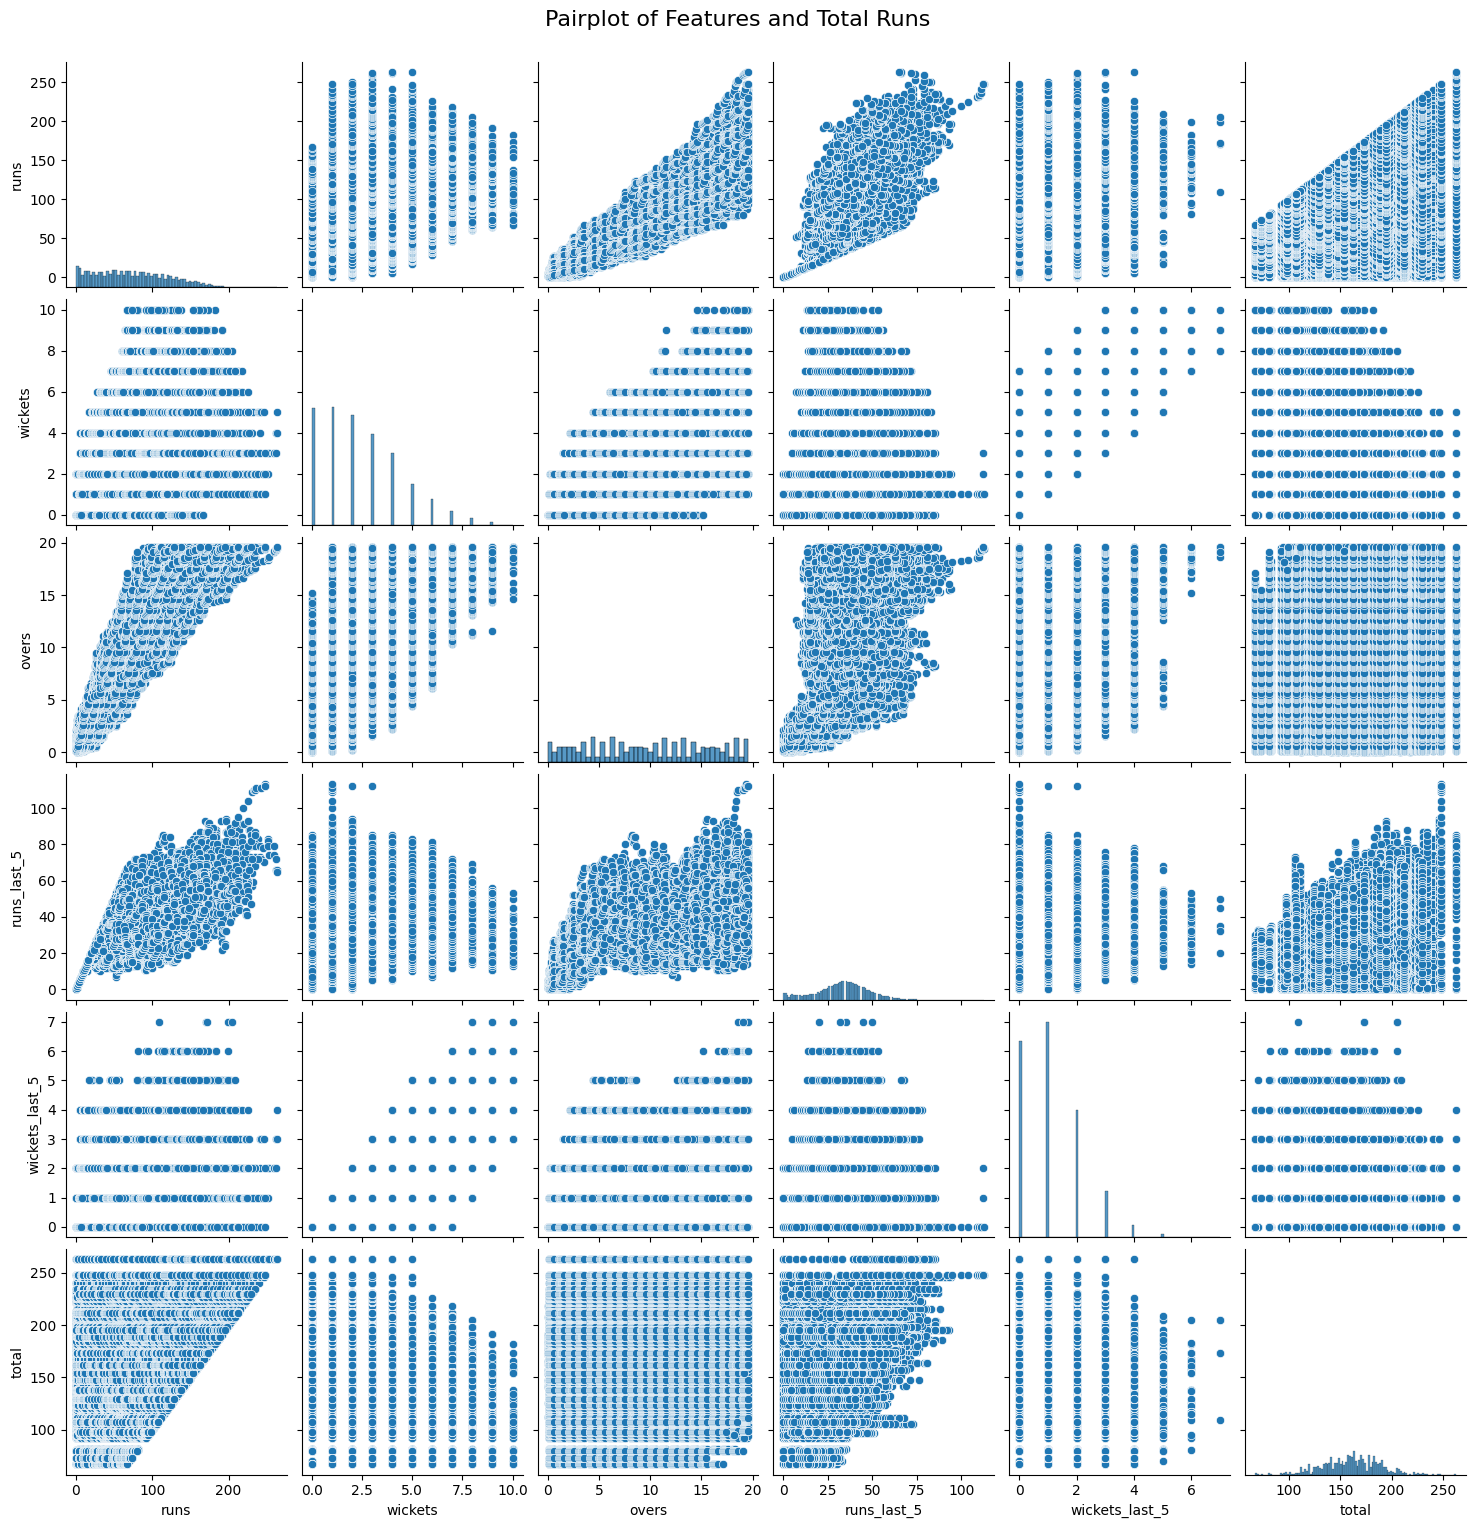

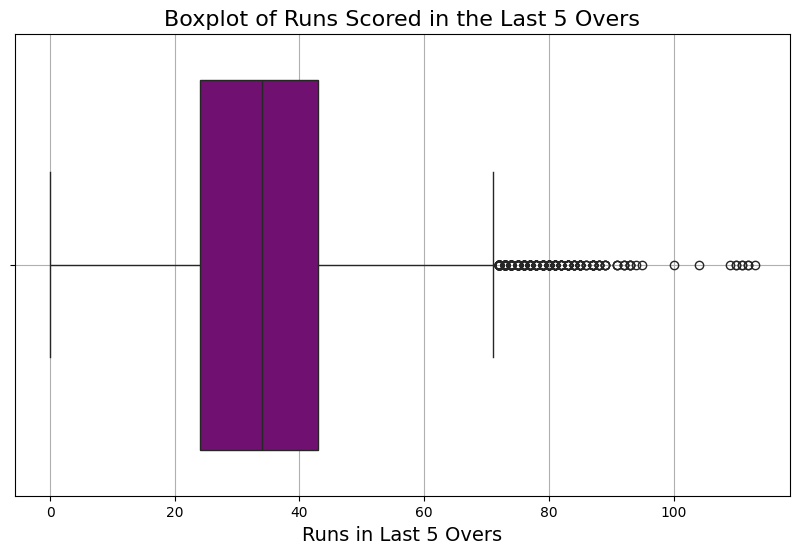

Mean Squared Error (MSE): 404.15
Root Mean Squared Error (RMSE): 20.10
R-squared (R²): 0.52


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
data = pd.read_csv("ipl_cleaned.csv")

# Selecting features (X) and label (Y)
X = data[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]
Y = data['total']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on test data
predictions = model.predict(X_test)

# Example input for prediction (adjust values based on the dataset's context)
inp = np.array([[1, 0, 2.1, 5, 1]])
inp_df = pd.DataFrame(inp, columns=X.columns)

# Predict using the trained model
prediction = model.predict(inp_df)
print('The predicted total runs for the input is:', prediction[0])

# Plot the Actual vs. Predicted Total Runs
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, color='green', edgecolor='black', alpha=0.6, label='Predictions')
plt.plot(Y_test, Y_test, color='red', linestyle='--', linewidth=2, label='Actual')
plt.title("Actual vs. Predicted Total Runs", fontsize=16)
plt.xlabel("Actual Total Runs", fontsize=14)
plt.ylabel("Predicted Total Runs", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plot the Residuals vs Predictions
residuals = Y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='blue', edgecolor='black', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predictions", fontsize=16)
plt.xlabel("Predicted Total Runs", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.grid(True)
plt.show()

# Additional Graph 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, linecolor='black')
plt.title('Correlation Matrix of IPL Dataset', fontsize=16)
plt.show()

# Additional Graph 2: Distribution of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='blue', label='Actual', kde=True, stat='density', alpha=0.5)
sns.histplot(predictions, color='green', label='Predicted', kde=True, stat='density', alpha=0.5)
plt.title('Distribution of Actual vs Predicted Total Runs', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Additional Graph 4: Pairplot of Key Features vs. Total Runs
sns.pairplot(data[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']])
plt.suptitle('Pairplot of Features and Total Runs', y=1.02, fontsize=16)
plt.show()

# Additional Graph 5: Boxplot of Runs in the Last 5 Overs
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['runs_last_5'], color='purple')
plt.title("Boxplot of Runs Scored in the Last 5 Overs", fontsize=16)
plt.xlabel("Runs in Last 5 Overs", fontsize=14)
plt.grid(True)
plt.show()

# Evaluate the model's performance using metrics
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
rmse = np.sqrt(mse)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


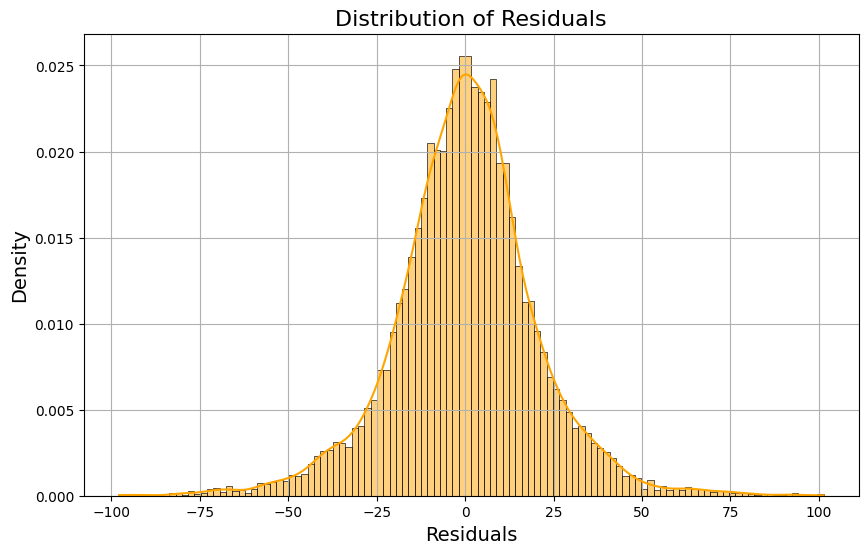

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='orange', stat='density')
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()


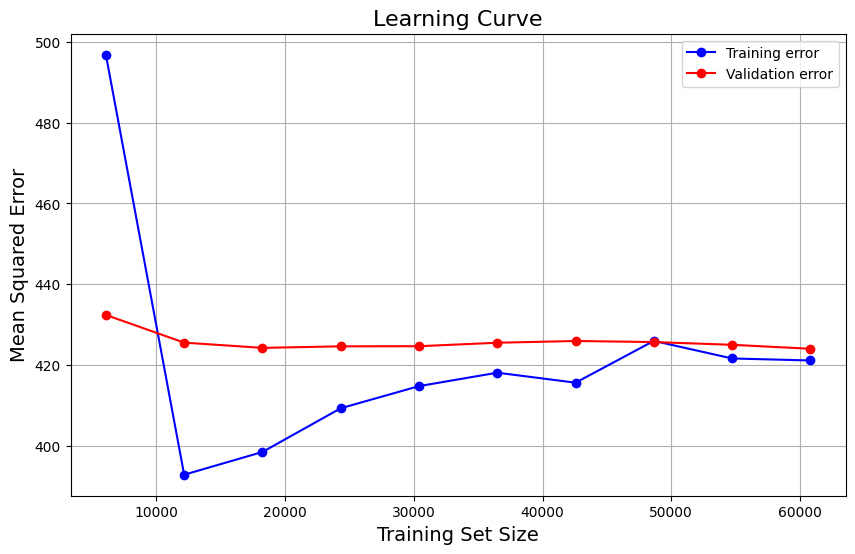

In [4]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, Y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation error')
plt.title('Learning Curve', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
